In [105]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [106]:
class WinCondition:
    def __init__(self, board=[[[]]], size=4):
        self.win_player = "X"
        self.board = board
        self.size = size

    def check_win(self):
        layers = self.check_all_layers()
        z_check = self.check_all_z()
        diag = self.check_cross_diagonals() or self.check_all_vertical_diagonals()

        return diag or z_check or layers

    def check_all_layers(self):
        return any(self.check_layer(z) for z in range(self.size))

    def check_all_z(self):
        return any(self.check_z(x, y) for x in range(self.size) for y in range(self.size))

    def check_all_vertical_diagonals(self):
        xdiag = any(self.check_vertical_xdiagonals(x) for x in range(self.size))
        ydiag = any(self.check_vertical_ydiagonals(y) for y in range(self.size))

        return xdiag or ydiag

    def check_layer(self, z):
        x_checker = any(self.check_x(y, z) for y in range(self.size))
        y_checker = any(self.check_y(x, z) for x in range(self.size))
        diag_checker = self.check_diagonals(z)

        return x_checker or y_checker or diag_checker

    def check_cross_diagonals(self):
        first = all(self.board[c][c][c] == self.win_player for c in range(self.size))
        second = all(self.board[c][(self.size-1) - c][(self.size-1) - c] == self.win_player for c in range(self.size))
        third = all(self.board[c][c][(self.size-1) - c] == self.win_player for c in range(self.size))
        fourth = all(self.board[c][(self.size-1) - c][c] == self.win_player for c in range(self.size))

        return first or second or third or fourth

    def check_x(self, y, z):
        return all(self.board[x][y][z] == self.win_player for x in range(self.size))

    def check_y(self, x, z):
        return all(self.board[x][y][z] == self.win_player for y in range(self.size))

    def check_diagonals(self, z):
        if all(self.board[diag][diag][z] == self.win_player for diag in range(self.size)):
            return True

        if all(
            self.board[(self.size-1) - reverse_diag][reverse_diag][z] == self.win_player
            for reverse_diag in range(self.size)
        ):
            return True

        return False

    def check_z(self, x, y):
        return all(self.board[x][y][z] == self.win_player for z in range(self.size))

    def check_vertical_xdiagonals(self, x):
        if all(self.board[x][diag][diag] == self.win_player for diag in range(self.size)):
            return True

        if all(
            self.board[x][reverse_diag][(self.size-1) - reverse_diag] == self.win_player
            for reverse_diag in range(self.size)
        ):
            return True

        return False

    def check_vertical_ydiagonals(self, y):
        if all(self.board[diag][y][diag] == self.win_player for diag in range(self.size)):
            return True

        if all(
            self.board[reverse_diag][y][(self.size-1) - reverse_diag] == self.win_player
            for reverse_diag in range(self.size)
        ):
            return True

        return False


In [107]:
class TicTacToe3D(WinCondition):
    def __init__(self, render_mode="computer", size=4):
        # 3D board: 4 layers of 4x4 grids
        super().__init__()
        self.size=size
        self.board = [[[" " for _ in range(self.size)] for _ in range(self.size)] for _ in range(self.size)]
        self.current_player = "X"
        self.players = ["X", "O"]
        self.terminated = False
        self.winner = " "
        self.render_mode = render_mode

    def check_draw(self):
        # Check for any empty space in the entire 3D board
        return not any(
            " " in self.board[x][y][z]
            for x in range(self.size)
            for y in range(self.size)
            for z in range(self.size)
        )

    def get_action_space(self):
        action_space = []
        for x in range(self.size):
            for y in range(self.size):
                for z in range(self.size):
                    if self.board[x][y][z] == " ":
                        action_space.append(self.get_position(x, y, z))

        action_space.sort()
        return action_space

    def print_board(self):
        # Prints each layer of the 3D board
        for layer in range(self.size):
            print(f"Layer {layer + 1}:")
            print("┌───┬───┬───┬───┐")
            for i, row in enumerate(self.board[layer]):
                print("│ " + " │ ".join(row) + " │")
                if i < self.size-1:
                    print("├───┼───┼───┼───┤")
            print("└───┴───┴───┴───┘")
            if layer < self.size-1:
                print()

    def create_visualization(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection="3d")

        for x in range(self.size):
            for y in range(self.size):
                for z in range(self.size):
                    if self.board[x][y][z] == "X":
                        ax.scatter(x, y, z, color="r", marker="o")
                    if self.board[x][y][z] == "O":
                        ax.scatter(x, y, z, color="b", marker="o")

        cmin = 0
        cmax = self.size-1

        ax.set_xticks(np.arange(cmin, cmax + 1, 1))
        ax.set_yticks(np.arange(cmin, cmax + 1, 1))
        ax.set_zticks(np.arange(cmin, cmax + 1, 1))

        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")

        if self.winner != " ":
            plt.title(f"Player {self.winner} Won!")
        else:
            plt.title(f"Player {self.current_player} Turn")

        plt.show()

    def change_player(self):
        if self.current_player == "X":
            self.current_player = "O"
        else:
            self.current_player = "X"

    def get_coordinates(self, position):
        x = int((position % (self.size**2) ) % self.size)
        y = int((position % (self.size**2) ) / self.size)
        z = int(position / (self.size**2) )

        return x, y, z

    def get_position(self, x, y, z):
        return z * (self.size)**2 + y * self.size + x

    def update_board(self, x, y, z):
        reward = 0

        if self.terminated:
            return self.board, reward, self.terminated, self.current_player

        if self.board[x][y][z] == " ":
            self.board[x][y][z] = self.current_player
        else:
            self.terminated = True
            return self.board, reward, self.terminated, self.current_player

        self.win_player = self.current_player
        win = self.check_win()
        draw = self.check_draw()

        self.terminated = win or draw

        if win:
            if self.current_player == "X":
                reward = -1
                self.winner = "X"
            else:
                reward = 1
                self.winner = "O"
        elif draw:
            reward = 0

        self.change_player()

        return self.board, reward, self.terminated, self.current_player

    def step_coordinates(self, x, y, z):
        # Output: Observation, reward, terminated, player_turn
        observation, reward, terminated, player_turn = self.update_board(x, y, z)

        if self.render_mode == "human":
            self.create_visualization()

        return observation, reward, terminated, player_turn

    def step(self, position):
        # Output: Observation, reward, terminated, player_turn
        x, y, z = self.get_coordinates(position)
        observation, reward, terminated, player_turn = self.update_board(x, y, z)

        if self.render_mode == "human":
            self.create_visualization()

        return observation, reward, terminated, player_turn

In [108]:
env = TicTacToe3D(size=3, render_mode="human")
# Render Mode as human would get you a visualization of your environment.

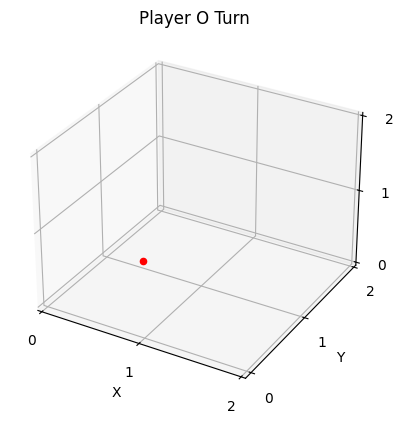

In [109]:
x = 1
y = 3
z = 0

position = env.get_position(x, y, z)
observation, reward, terminated, player_turn = env.step(position)

In [110]:
#Helpers
def get_coordinates(position, size):
    x = int((position % (size**2) ) % size)
    y = int((position % (size**2) ) / size)
    z = int(position / (size**2) )

    return x, y, z

def get_position(x, y, z, size):
    return z * (size)**2 + y * size + x

def is_corner(coordinates, size):
    return all(coord == 0 or coord == size-1 for coord in coordinates)

def get_all_corners(size):
    return [position for position in range(size*size*size) if is_corner(get_coordinates(position, size), size)]

def find_opposite_corners(size):
    opposite_corners = {}

    for x1 in [0, size-1]:
        for y1 in [0, size-1]:
            for z1 in [0, size-1]:
                
                x2 = size-1 - x1
                y2 = size-1 - y1
                z2 = size-1 - z1

                opposite_corners[get_position(x1,y1,z1,size)] = get_position(x2,y2,z2,size)
                opposite_corners[get_position(x2,y2,z2,size)] = get_position(x1,y1,z1,size)

    return opposite_corners
# # Find all corners
# corner_positions = get_all_corners(3)
# opp_corn=find_opposite_corners(3)

In [111]:
# Credits: we have repurposed some of code written above to create a rule based game system

import copy

def check_win(board, win_player, size):
    layers = check_all_layers(board, win_player, size)
    z_check = check_all_z(board, win_player, size)
    diag = check_cross_diagonals(board, win_player, size) or check_all_vertical_diagonals(board, win_player, size)

    return diag or z_check or layers

def check_all_layers(board, win_player, size):
    return any(check_layer(z, board, win_player, size) for z in range(size))

def check_all_z(board, win_player, size):
    return any(check_z(x, y, board, win_player, size) for x in range(size) for y in range(size))

def check_all_vertical_diagonals(board, win_player, size):
    xdiag = any(check_vertical_xdiagonals(x, board, win_player, size) for x in range(size))
    ydiag = any(check_vertical_ydiagonals(y, board, win_player, size) for y in range(size))

    return xdiag or ydiag


def check_layer(z,board, win_player, size):
    x_checker = any(check_x(y, z, board, win_player,size) for y in range(size))
    y_checker = any(check_y(x, z, board, win_player,size) for x in range(size))
    diag_checker = check_diagonals(z, board, win_player, size)

    return x_checker or y_checker or diag_checker


def check_cross_diagonals(board, win_player, size):
    first = all(board[c][c][c] == win_player for c in range(size))
    second = all(board[c][(size-1)-c][(size-1)-c] == win_player for c in range(size))
    third = all(board[c][c][(size-1)-c] == win_player for c in range(size))
    fourth = all(board[c][(size-1)-c][c] == win_player for c in range(size))

    return first or second or third or fourth

def check_x(y, z, board, win_player, size):
    return all(board[x][y][z] == win_player for x in range(size))


def check_y(x, z, board, win_player, size):
    return all(board[x][y][z] == win_player for y in range(size))


def check_diagonals(z, board, win_player, size):
    if all(board[diag][diag][z] == win_player for diag in range(size)):
        return True

    if all(board[(size-1)-reverse_diag][reverse_diag][z] == win_player for reverse_diag in range(size)):
        return True

    return False

def check_z(x, y, board, win_player, size):
    return all(board[x][y][z] == win_player for z in range(size))


def check_vertical_xdiagonals(x, board, win_player, size):
    if all(board[x][diag][diag] == win_player for diag in range(size)):
        return True

    if all(board[x][reverse_diag][(size-1)-reverse_diag] == win_player for reverse_diag in range(size)):
        return True

    return False


def check_vertical_ydiagonals(y, board, win_player, size):
    if all(board[diag][y][diag] == win_player for diag in range(size)):
        return True

    if all(board[reverse_diag][y][(size-1)-reverse_diag] == win_player for reverse_diag in range(size)):
        return True

    return False

########### To check for n-1 moves done in a row where the nth move is an empty space
def check_n_minus_one(board, win_player, size):
    layers = check_n_minus_one_all_layers(board, win_player, size)
    z_check = check_n_minus_one_all_z(board, win_player, size)
    diag = check_n_minus_one_cross_diagonals(board, win_player, size) or check_n_minus_one_all_vertical_diagonals(board, win_player, size)

    return diag or z_check or layers


def check_n_minus_one_all_layers(board, win_player, size):
    return any(check_n_minus_one_layer(z, board, win_player, size) for z in range(size))

def check_n_minus_one_all_z(board, win_player, size):
    return any(check_n_minus_one_z(x, y, board, win_player, size) for x in range(size) for y in range(size))

def check_n_minus_one_all_vertical_diagonals(board, win_player, size):

    xdiag = any(check_n_minus_one_vertical_xdiagonals(x, board, win_player, size) for x in range(size))
    ydiag = any(check_n_minus_one_vertical_ydiagonals(y, board, win_player, size) for y in range(size))

    return xdiag or ydiag


def check_n_minus_one_layer(z,board, win_player, size):
    x_checker = any(check_n_minus_one_x(y, z, board, win_player, size) for y in range(size))
    y_checker = any(check_n_minus_one_y(x, z, board, win_player, size) for x in range(size))
    diag_checker = check_n_minus_one_diagonals(z, board, win_player, size)

    return x_checker or y_checker or diag_checker


def check_n_minus_one_cross_diagonals(board, win_player, size):
    first = (sum(board[c][c][c] == win_player for c in range(size))==(size-1)) and any(board[c][c][c] == ' ' for c in range(size))
    second = (sum(board[c][(size-1)-c][(size-1)-c] == win_player for c in range(size))==(size-1)) and any(board[c][(size-1)-c][(size-1)-c] == ' ' for c in range(size))
    third = (sum(board[c][c][(size-1)-c] == win_player for c in range(size))==(size-1)) and any(board[c][c][(size-1)-c] == ' ' for c in range(size))
    fourth = (sum(board[c][(size-1)-c][c] == win_player for c in range(size))==(size-1)) and any(board[c][(size-1)-c][c] == ' ' for c in range(size))

    return first or second or third or fourth

def check_n_minus_one_x(y, z, board, win_player, size):
    return (sum(board[x][y][z] == win_player for x in range(size))==(size-1)) and any(board[x][y][z] == ' ' for x in range(size))


def check_n_minus_one_y(x, z, board, win_player, size):
    return (sum(board[x][y][z] == win_player for y in range(size))==(size-1)) and any(board[x][y][z] == ' ' for y in range(size))


def check_n_minus_one_diagonals(z, board, win_player, size):
    if (sum(board[diag][diag][z] == win_player for diag in range(size))==(size-1)) and any(board[diag][diag][z] == ' ' for diag in range(size)):
        return True

    if (sum(board[(size-1)-reverse_diag][reverse_diag][z] == win_player for reverse_diag in range(size))==(size-1)) and any(board[(size-1)-reverse_diag][reverse_diag][z] == ' ' for reverse_diag in range(size)):
        return True

    return False

def check_n_minus_one_z(x, y, board, win_player, size):
    return (sum(board[x][y][z] == win_player for z in range(size))==(size-1)) and any(board[x][y][z] == ' ' for z in range(size))


def check_n_minus_one_vertical_xdiagonals(x, board, win_player, size):
    if (sum(board[x][diag][diag] == win_player for diag in range(size))==(size-1)) and any(board[x][diag][diag] == ' ' for diag in range(size)):
        return True

    if (sum(board[x][reverse_diag][(size-1)-reverse_diag] == win_player for reverse_diag in range(size))==(size-1)) and any(board[x][reverse_diag][(size-1)-reverse_diag] == ' ' for reverse_diag in range(size)):
        return True

    return False


def check_n_minus_one_vertical_ydiagonals(y, board, win_player, size):
    if (sum(board[diag][y][diag] == win_player for diag in range(size))==(size-1)) and any(board[diag][y][diag] == ' ' for diag in range(size)):
        return True

    if (sum(board[reverse_diag][y][(size-1)-reverse_diag] == win_player for reverse_diag in range(size))==(size-1)) and any(board[reverse_diag][y][(size-1)-reverse_diag] == ' ' for reverse_diag in range(size)):
        return True

    return False

###########

########### To check for fork moves done in a row where the 4th move is an empty space
def check_fork(board, win_player, size):
    layers = check_fork_all_layers(board, win_player, size)
    z_check = check_fork_all_z(board, win_player, size)
    diag = check_fork_cross_diagonals(board, win_player, size) + check_fork_all_vertical_diagonals(board, win_player, size)
    if diag+z_check+layers >=2:
        return True
    else:
        return False


def check_fork_all_layers(board, win_player, size):
    return sum(check_fork_layer(z, board, win_player,size) for z in range(size))

def check_fork_all_z(board, win_player, size):
    return sum(check_fork_z(x, y, board, win_player,size) for x in range(size) for y in range(size))

def check_fork_all_vertical_diagonals(board, win_player, size):

    xdiag = sum(check_fork_vertical_xdiagonals(x, board, win_player, size) for x in range(size))
    ydiag = sum(check_fork_vertical_ydiagonals(y, board, win_player, size) for y in range(size))

    return xdiag + ydiag


def check_fork_layer(z,board, win_player, size):
    x_checker = sum(check_fork_x(y, z, board, win_player, size) for y in range(size))
    y_checker = sum(check_fork_y(x, z, board, win_player, size) for x in range(size))
    diag_checker = check_fork_diagonals(z, board, win_player, size)

    return x_checker + y_checker + diag_checker


def check_fork_cross_diagonals(board, win_player, size):
    first = (sum(board[c][c][c] == win_player for c in range(size))==(size-1)) and any(board[c][c][c] == ' ' for c in range(size))
    second = (sum(board[c][(size-1)-c][(size-1)-c] == win_player for c in range(size))==(size-1)) and any(board[c][(size-1)-c][(size-1)-c] == ' ' for c in range(size))
    third = (sum(board[c][c][(size-1)-c] == win_player for c in range(size))==(size-1)) and any(board[c][c][(size-1)-c] == ' ' for c in range(size))
    fourth = (sum(board[c][(size-1)-c][c] == win_player for c in range(size))==(size-1)) and any(board[c][(size-1)-c][c] == ' ' for c in range(size))

    return first + second + third + fourth

def check_fork_x(y, z, board, win_player, size):
    return (sum(board[x][y][z] == win_player for x in range(size))==(size-1)) and any(board[x][y][z] == ' ' for x in range(size))


def check_fork_y(x, z, board, win_player, size):
    return (sum(board[x][y][z] == win_player for y in range(size))==(size-1)) and any(board[x][y][z] == ' ' for y in range(size))


def check_fork_diagonals(z, board, win_player, size):
    val = 0
    if (sum(board[diag][diag][z] == win_player for diag in range(size))==(size-1)) and any(board[diag][diag][z] == ' ' for diag in range(size)):
        val+=1

    if (sum(board[(size-1)-reverse_diag][reverse_diag][z] == win_player for reverse_diag in range(size))==(size-1)) and any(board[(size-1)-reverse_diag][reverse_diag][z] == ' ' for reverse_diag in range(size)):
        val+=1

    return val

def check_fork_z(x, y, board, win_player, size):
    return (sum(board[x][y][z] == win_player for z in range(size))==(size-1)) and any(board[x][y][z] == ' ' for z in range(size))


def check_fork_vertical_xdiagonals(x, board, win_player, size):
    val=0
    if (sum(board[x][diag][diag] == win_player for diag in range(size))==(size-1)) and any(board[x][diag][diag] == ' ' for diag in range(size)):
        val+=1

    if (sum(board[x][reverse_diag][(size-1)-reverse_diag] == win_player for reverse_diag in range(size))==(size-1)) and any(board[x][reverse_diag][(size-1)-reverse_diag] == ' ' for reverse_diag in range(size)):
        val+=1

    return val


def check_fork_vertical_ydiagonals(y, board, win_player, size):
    val=0
    if (sum(board[diag][y][diag] == win_player for diag in range(size))==(size-1)) and any(board[diag][y][diag] == ' ' for diag in range(size)):
        val+=1

    if (sum(board[reverse_diag][y][(size-1)-reverse_diag] == win_player for reverse_diag in range(size))==(size-1)) and any(board[reverse_diag][y][(size-1)-reverse_diag] == ' ' for reverse_diag in range(size)):
        val+=1

    return val

# Our rule based policy
def policy_player1(observation, action_space, size):
    us='X'
    opponent='O'

    corners= get_all_corners(size)
    opposite_corner=find_opposite_corners(size)

    # If we are winning in next action
    for next_action in action_space:
      x,y,z=get_coordinates(next_action, size)

      nextobservation=copy.deepcopy(observation)
 
      nextobservation[x][y][z]=us

      if check_win(nextobservation, us, size):
        return next_action


    # If opponent is winning in next action and we have to block the opponent
    for next_action in action_space:

      x,y,z=get_coordinates(next_action, size)

      nextobservation=copy.deepcopy(observation)

      nextobservation[x][y][z]=opponent

      if check_win(nextobservation, opponent, size):
        return next_action

    # Create an opportunity for a fork
    for next_action in action_space:
      x,y,z=get_coordinates(next_action, size)

      nextobservation=copy.deepcopy(observation)

      nextobservation[x][y][z]=us

      if check_fork(nextobservation, us, size):
        return next_action

    # block the opponent's fork if the opponent can make a fork in the next move
    for next_action in action_space:
      x,y,z=get_coordinates(next_action, size)

      nextobservation=copy.deepcopy(observation)

      nextobservation[x][y][z]=opponent

      if check_fork(nextobservation, opponent, size):
        return next_action
    if size>3:
        # Create a situation where when place on action_space we have n-1 of our pieces in a particular direction
        for next_action in action_space:
            x,y,z=get_coordinates(next_action, size)

            nextobservation=copy.deepcopy(observation)

            nextobservation[x][y][z]=us

            if check_n_minus_one(nextobservation, us, size):
                return next_action

        # If the opponent will get n-1 pieces in a row in the next action, prevent it from happening and block the opponent's path
        for next_action in action_space:
            x,y,z=get_coordinates(next_action, size)

            nextobservation=copy.deepcopy(observation)

            nextobservation[x][y][z]=opponent

            if check_n_minus_one(nextobservation, opponent, size):
                return next_action

    # Take the opposite corner from the opponent (diagonal)
    for corner in corners:
      if corner in action_space:
        if opposite_corner[corner]==opponent:
          return corner

    # Take any corner
    # for corner in corners:
    #   if corner in action_space:
    #     return corner
    valid_corners = [corner for corner in corners if corner in action_space]

    if valid_corners:
        return random.choice(valid_corners)

    # Do any available position if all the above conditions fail
    # for next_action in action_space:
    #     return next_action
    return random.choice(action_space)

# Initialized as a random policy for player 2
def policy_player2(observation, action_space, size):

    us='O'
    opponent='X'

    corners= get_all_corners(size)
    opposite_corner=find_opposite_corners(size)


    # If we are winning in next action
    for next_action in action_space:
      x,y,z=get_coordinates(next_action, size)

      nextobservation=copy.deepcopy(observation)

      nextobservation[x][y][z]=us

      if check_win(nextobservation, us, size):
        return next_action


    # If opponent is winning in next action and we have to block the opponent
    for next_action in action_space:

      x,y,z=get_coordinates(next_action, size)

      nextobservation=copy.deepcopy(observation)

      nextobservation[x][y][z]=opponent

      if check_win(nextobservation, opponent, size):
        return next_action

    # Create an opportunity for a fork
    for next_action in action_space:
      x,y,z=get_coordinates(next_action, size)

      nextobservation=copy.deepcopy(observation)

      nextobservation[x][y][z]=us

      if check_fork(nextobservation, us, size):
        return next_action

    # block the opponent's fork if the opponent can make a fork in the next move
    for next_action in action_space:
      x,y,z=get_coordinates(next_action, size)

      nextobservation=copy.deepcopy(observation)

      nextobservation[x][y][z]=opponent

      if check_fork(nextobservation, opponent, size):
        return next_action
      
    if size>3:
        # # Create a situation where when place on action_space we have n-1 of our pieces in a particular direction
        for next_action in action_space:
            x,y,z=get_coordinates(next_action, size)

            nextobservation=copy.deepcopy(observation)

            nextobservation[x][y][z]=us

        if check_n_minus_one(nextobservation, us, size):
            return next_action

        # If the opponent will get 3 pieces in a row in the next action, prevent it from happening and block the opponent's path
        for next_action in action_space:
            x,y,z=get_coordinates(next_action, size)

            nextobservation=copy.deepcopy(observation)

            nextobservation[x][y][z]=opponent

        if check_n_minus_one(nextobservation, opponent, size):
            return next_action

    # Take the opposite corner from the opponent (diagonal)
    for corner in corners:
      if corner in action_space:
        if opposite_corner[corner]==opponent:
          return corner

    # Take any random corner
    # for corner in corners:
    #   if corner in action_space:
    #     return corner
    valid_corners = [corner for corner in corners if corner in action_space]

    if valid_corners:
        return random.choice(valid_corners)

    # take any position
    return random.choice(action_space)
    # Do any available position if all the above conditions fail
    # for next_action in action_space:
        # return next_action

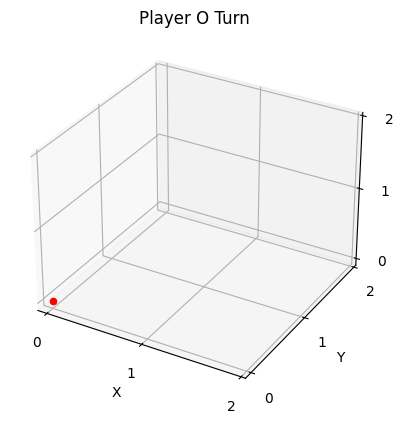

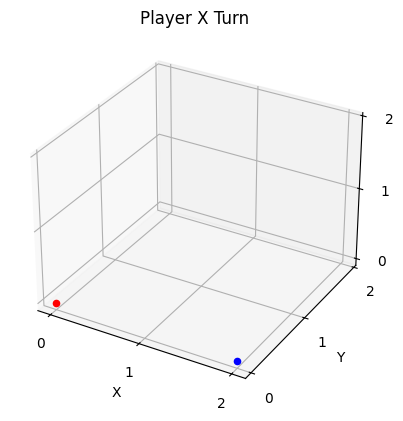

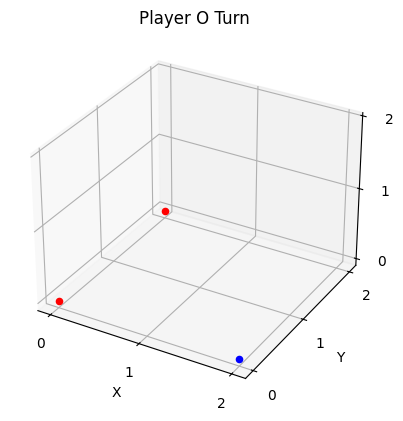

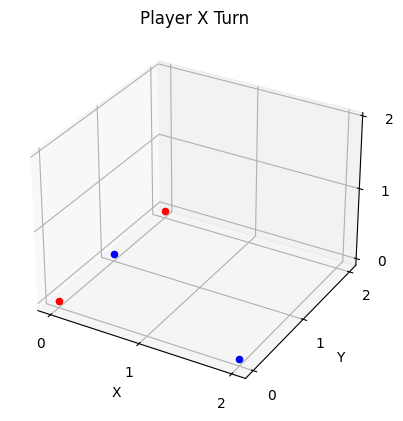

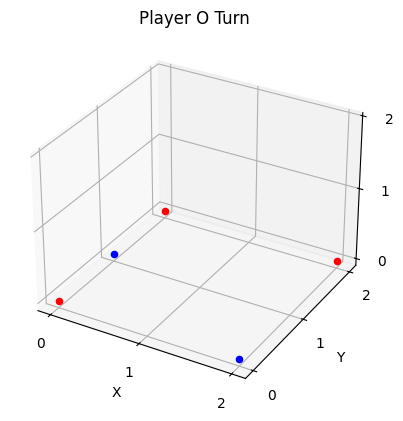

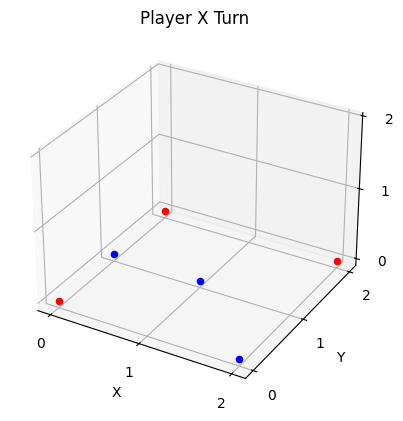

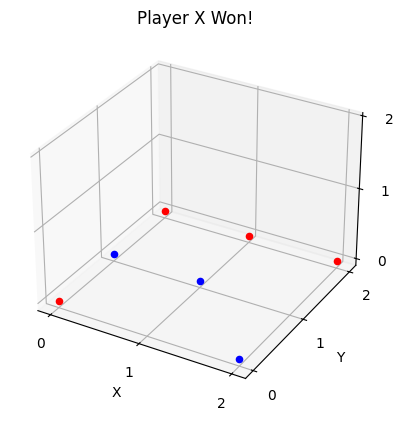

-1

In [112]:
def play_one_game(policy_player1, policy_player2, render_mode="computer", size=4):
    env = TicTacToe3D(render_mode, size)

    terminated = 0
    observation = [[[" " for _ in range(size)] for _ in range(size)] for _ in range(size)]
    reward = 0
    player_turn = "X"

    while not terminated:

        action_space = env.get_action_space()

        if player_turn == "X":
            action = policy_player1(observation, action_space, size)
        else:
            action = policy_player2(observation, action_space, size)

        observation, reward, terminated, player_turn = env.step(action)


    return reward  # This is the player who won

play_one_game(policy_player1, policy_player2, render_mode="human", size=3)

In [104]:
X=0
O=0
draw=0
for i in range(10):
  winner=play_one_game(policy_player1, policy_player2, size=2)
  if winner==-1:
    X+=1
  elif winner == 1:
    O+=1
  else:
    draw+=1

print("X won: ", X, "times")
print("O won: ", O, "times")
print("draw", draw )

X won:  10 times
O won:  0 times
draw 0


I have completed the Tic Tac Toe 3D Game and also added some other functionality that helps speedy development.  

You can use any approach to solve this problem. Your solution will be used to compete against other players. Ofcourse you need to store the weights of the neural network / QTable in a separate file.  

You also have to write a function that takes in the observtion from env.step() and outputs an action.  

You will submit that file and a function that loads those weights and plays the game.  